# Preguntas a resolver

1. ¿ Que usuario a invertido el mayor tiempo ?
2. ¿Cuáles episodios o películas son las más vistas por todos los usuarios?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Projects/Netflix/netflix-report/CONTENT_INTERACTION'
!ls

/content/drive/My Drive/Colab Notebooks/Projects/Netflix/netflix-report/CONTENT_INTERACTION
InteractiveTitles.gsheet  SearchHistory.gsheet
MyList.gsheet		  total-episodios-o-peliculas.png
netflix-usuarios.png	  ViewingActivity.csv
Ratings.csv		  ViewingActivity.gsheet


# Importando y visualizando la data

In [ ]:
df = pd.read_csv("ViewingActivity.csv")
df.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,natalia,2021-02-16 18:15:38,0:03:33,NaN,The Walking Dead: Temporada 3: Enfermo (Capítu...,NaN,DefaultWidevineAndroidPhone,0:06:21,0:06:21,CO (Colombia)
1,natalia,2021-02-16 18:01:51,0:11:46,NaN,The Walking Dead: Temporada 3: Semilla (Capítu...,NaN,DefaultWidevineAndroidPhone,0:42:28,0:42:28,CO (Colombia)
2,natalia,2021-02-16 17:04:11,0:31:36,Autoplayed: user action: Unspecified;,La Reina del Sur: Temporada 2: Episodio 7 (Cap...,NaN,TCL ODM Smart TV 2K17 MS6586 Smart TV,0:38:16,0:38:16,CO (Colombia)
3,natalia,2021-02-16 16:06:39,0:16:28,NaN,100 días para enamorarnos: Temporada 2: Dos co...,NaN,TCL ODM Smart TV 2K17 MS6586 Smart TV,0:17:23,0:17:23,CO (Colombia)
4,natalia,2021-02-16 15:35:46,0:30:35,Autoplayed: user action: Unspecified;,100 días para enamorarnos: Temporada 2: No te ...,NaN,TCL ODM Smart TV 2K17 MS6586 Smart TV,0:53:04,0:53:04,CO (Colombia)
5,natalia,2021-02-16 1:28:17,0:13:49,NaN,The Walking Dead: Temporada 3: Semilla (Capítu...,NaN,DefaultWidevineAndroidPhone,0:14:19,Not latest view,CO (Colombia)
6,natalia,2021-02-16 0:10:02,0:20:07,Autoplayed: user action: Unspecified;,100 días para enamorarnos: Temporada 2: No te ...,NaN,TCL ODM Smart TV 2K17 MS6586 Smart TV,0:21:56,Not latest view,CO (Colombia)
7,natalia,2021-02-15 22:50:37,0:00:16,NaN,Burn Out,NaN,DefaultWidevineAndroidPhone,0:30:56,0:30:56,CO (Colombia)
8,natalia,2021-02-15 22:41:45,0:04:59,NaN,Burn Out,NaN,DefaultWidevineAndroidPhone,0:30:45,Not latest view,CO (Colombia)
9,natalia,2021-02-15 22:32:21,0:00:01,NaN,The Walking Dead: Temporada 3: Semilla (Capítu...,NaN,DefaultWidevineAndroidPhone,0:00:01,Not latest view,CO (Colombia)


Observamos el tamaño data

In [ ]:
df.shape

(3800, 10)

In [ ]:
df.describe()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
count,3800,3800,3800,1055,3800,631,3800,3800,3800,3800
unique,5,3799,1774,3,1876,9,11,1991,1155,2
top,usuario 5,2021-02-16 16:06:39,0:00:04,Autoplayed: user action: None;,Kong: La isla calavera,HOOK,Android DefaultWidevineL3Phone Android Phone,0:00:04,Not latest view,CO (Colombia)
freq,1155,2,103,662,16,316,1002,77,1609,3798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             3800 non-null   object
 1   Start Time               3800 non-null   object
 2   Duration                 3800 non-null   object
 3   Attributes               1055 non-null   object
 4   Title                    3800 non-null   object
 5   Supplemental Video Type  631 non-null    object
 6   Device Type              3800 non-null   object
 7   Bookmark                 3800 non-null   object
 8   Latest Bookmark          3800 non-null   object
 9   Country                  3800 non-null   object
dtypes: object(10)
memory usage: 297.0+ KB


cambiando el tipo de variable a los atributos

In [ ]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [ ]:
df.dtypes

Profile Name                        object
Start Time                          object
Duration                   timedelta64[ns]
Attributes                          object
Title                               object
Supplemental Video Type             object
Device Type                         object
Bookmark                            object
Latest Bookmark                     object
Country                             object
dtype: object

Observamos los usuarios

In [ ]:
df['Profile Name'].value_counts()

usuario 5                1155
sergio                   1046
natalia                  1024
yimer                     559
sergioandresrubiano25      16
Name: Profile Name, dtype: int64

Remplazamos el nombre del usuario por uno anonimo

In [ ]:
df['Profile Name'].replace({"sergio":'usuario 1','natalia':'usuario 2', 'yimer':'usuario 3','sergioandresrubiano25':'usuario 4'},inplace=True)

In [ ]:
df['Profile Name'].value_counts()

usuario 5    1155
usuario 1    1046
usuario 2    1024
usuario 3     559
usuario 4      16
Name: Profile Name, dtype: int64

1. ¿ Que usuario a invertido el mayor tiempo ?

In [ ]:
df['Duration'].head(10)

0   0 days 00:03:33
1   0 days 00:11:46
2   0 days 00:31:36
3   0 days 00:16:28
4   0 days 00:30:35
5   0 days 00:13:49
6   0 days 00:20:07
7   0 days 00:00:16
8   0 days 00:04:59
9   0 days 00:00:01
Name: Duration, dtype: timedelta64[ns]

Filtramos el tiempo mayor a un minuto

In [ ]:
df[(df['Duration'] > '0 days 00:01:00')]
df.shape

(3800, 10)

En general:

In [ ]:
df['Duration'].sum()

Timedelta('46 days 20:06:15')

Tiempo invertido por usuario

In [ ]:
usuario_1 = df.loc[df['Profile Name'] == 'usuario 1']
duracion_usuario_1 = usuario_1['Duration'].sum()

usuario_2 = df.loc[df['Profile Name'] == 'usuario 2']
duracion_usuario_2 = usuario_2['Duration'].sum()

usuario_3 = df.loc[df['Profile Name'] == 'usuario 3']
duracion_usuario_3 = usuario_3['Duration'].sum()

usuario_4 = df.loc[df['Profile Name'] == 'usuario 4']
duracion_usuario_4 = usuario_4['Duration'].sum()

usuario_5 = df.loc[df['Profile Name'] == 'usuario 5']
duracion_usuario_5 = usuario_5['Duration'].sum()

print(f"""

duracion_usuario_1 = {duracion_usuario_1}
duracion_usuario_2 = {duracion_usuario_2}
duracion_usuario_3 = {duracion_usuario_3}
duracion_usuario_4 = {duracion_usuario_4}
duracion_usuario_5 = {duracion_usuario_5}


""")



duracion_usuario_1 = 10 days 04:01:22
duracion_usuario_2 = 11 days 20:08:55
duracion_usuario_3 = 6 days 20:03:47
duracion_usuario_4 = 0 days 01:21:46
duracion_usuario_5 = 17 days 22:30:25





semanas

In [ ]:
usuario_1['Start Time'] = pd.to_datetime(usuario_1['Start Time'])
usuario_1['weekday'] = usuario_1['Start Time'].dt.weekday

usuario_2['Start Time'] = pd.to_datetime(usuario_2['Start Time'])
usuario_2['weekday'] = usuario_2['Start Time'].dt.weekday

usuario_3['Start Time'] = pd.to_datetime(usuario_3['Start Time'])
usuario_3['weekday'] = usuario_3['Start Time'].dt.weekday

usuario_4['Start Time'] = pd.to_datetime(usuario_4['Start Time'])
usuario_4['weekday'] = usuario_4['Start Time'].dt.weekday

usuario_5['Start Time'] = pd.to_datetime(usuario_5['Start Time'])
usuario_5['weekday'] = usuario_5['Start Time'].dt.weekday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
usuario_1['weekday'] = pd.Categorical(usuario_1['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
office_by_day_1 = usuario_1['weekday'].value_counts()
office_by_day_1 = office_by_day_1.sort_index()

usuario_2['weekday'] = pd.Categorical(usuario_2['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
office_by_day_2 = usuario_2['weekday'].value_counts()
office_by_day_2 = office_by_day_2.sort_index()

usuario_3['weekday'] = pd.Categorical(usuario_3['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
office_by_day_3 = usuario_3['weekday'].value_counts()
office_by_day_3 = office_by_day_3.sort_index()

usuario_4['weekday'] = pd.Categorical(usuario_4['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
office_by_day_4 = usuario_4['weekday'].value_counts()
office_by_day_4 = office_by_day_4.sort_index()

usuario_5['weekday'] = pd.Categorical(usuario_5['weekday'], categories=[0,1,2,3,4,5,6],ordered=True)
office_by_day_5 = usuario_5['weekday'].value_counts()
office_by_day_5 = office_by_day_5.sort_index()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
#creando DataFrame nuevo.
df_usuarios_semanas = pd.DataFrame({f'Usuario 1 = {duracion_usuario_1}':office_by_day_1, f'Usuario 2 = {duracion_usuario_2}':office_by_day_2, 
                  f'Usuario 3 = {duracion_usuario_3}':office_by_day_3, f'Usuario 4 = {duracion_usuario_4}':office_by_day_4, f'Usuario 5 = {duracion_usuario_5}':office_by_day_5})

#cambiando los ejes por el nombre de la semana
df_usuarios_semanas = df_usuarios_semanas.rename(index={0: 'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'})

In [ ]:
df_usuarios_semanas

,Usuario 1 = 10 days 04:01:22,Usuario 2 = 11 days 20:08:55,Usuario 3 = 6 days 20:03:47,Usuario 4 = 0 days 01:21:46,Usuario 5 = 17 days 22:30:25
Lunes,159,156,125,2,199
Martes,166,137,63,1,167
Miercoles,135,127,53,5,128
Jueves,124,161,23,0,144
Viernes,97,153,38,1,152
Sabado,155,154,119,1,152
Domingo,210,136,138,6,213


## Generando grafico

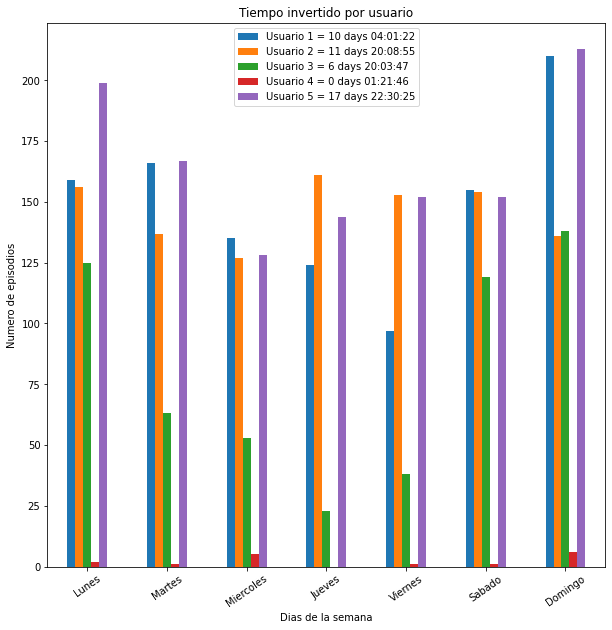

In [ ]:
df_usuarios_semanas.plot(kind = 'bar', figsize=(10,10))
plt.title('Tiempo invertido por usuario')
plt.xlabel("Dias de la semana")
plt.ylabel("Numero de episodios")
plt.xticks(rotation=35)
plt.savefig('netflix-usuarios.png')



## Episodios o peliculas más vistas por todos los usuarios (en general)

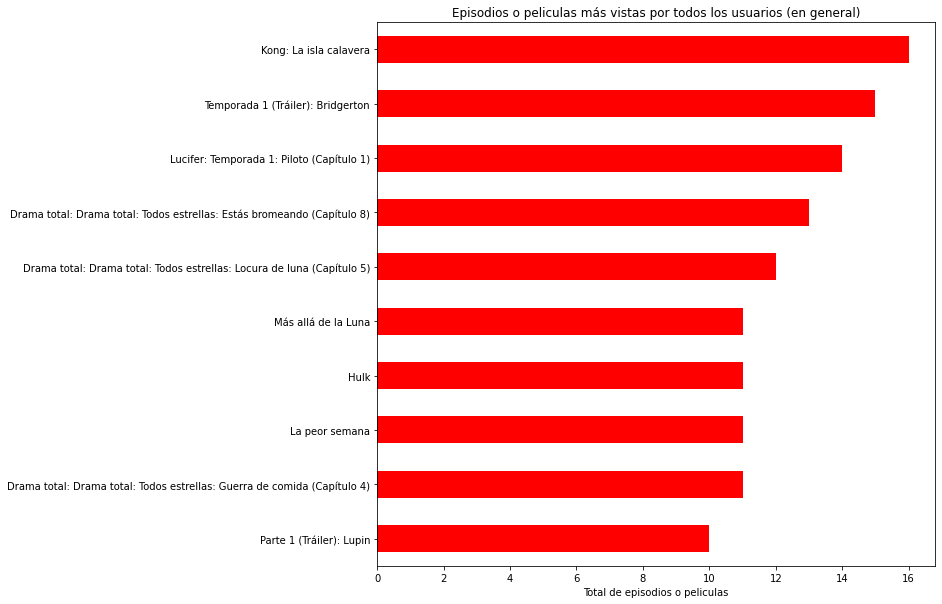

In [ ]:
ax = df['Title'].value_counts().head(10).plot(kind = 'barh', figsize=(10,10), color='red')
plt.title('Episodios o peliculas más vistas por todos los usuarios (en general)')
plt.xlabel('Total de episodios o peliculas')
plt.savefig('total-episodios-o-peliculas.png')
ax.invert_yaxis()

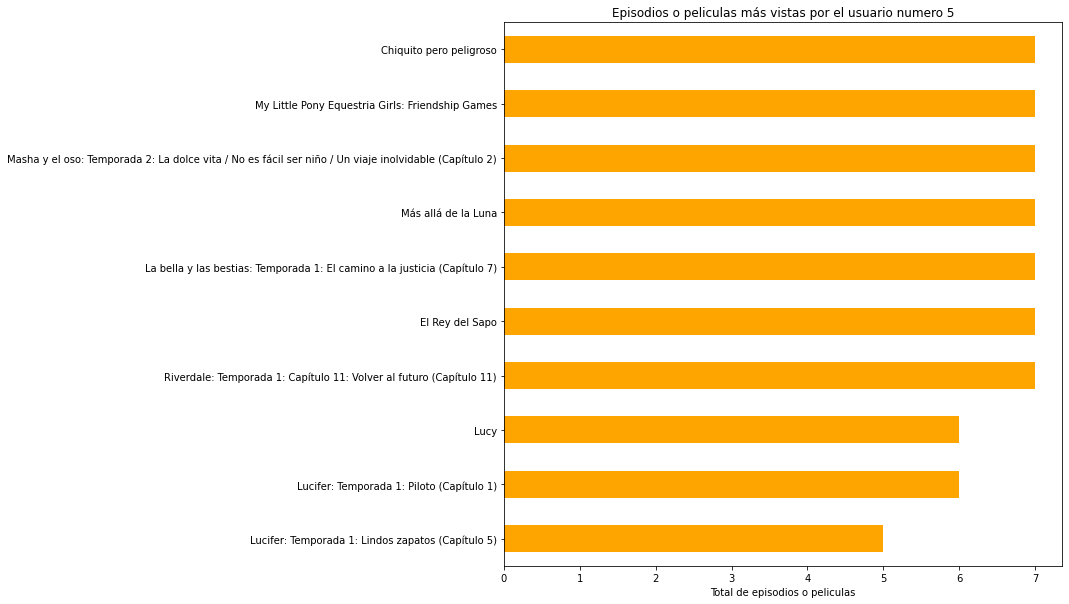

In [ ]:
ax = usuario_5['Title'].value_counts().head(10).plot(kind = 'barh', figsize=(10,10), color='orange')
plt.title('Episodios o peliculas más vistas por el usuario numero 5')
plt.xlabel('Total de episodios o peliculas')
plt.savefig('usuario5-episodios-o-peliculas.png')
ax.invert_yaxis()